## Import library

In [78]:
#!pip install pycaret

In [79]:
# For managing data
import pandas as pd
import numpy as np

# For importing data from Google Drive
from google.colab import drive


# For visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For styling an visualisation
%matplotlib inline
sns.set_style()
mpl.rcParams["font.size"] = 14

# For data preprocessing for ML model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# For training multiple ML algorithm and a comparison
from pycaret.classification import *

# For model evaluation
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

## Import dataset

Dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [80]:
drive.mount("/content/drive")
dataset_path = "/content/drive/MyDrive/My Note/dataset/credit_risk_dataset.csv"
df = pd.read_csv(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Cleaning

### Removing duplicate

In [82]:
print("Number of duplicate:", df.duplicated().sum())

df.drop_duplicates(inplace = True)

print("(Recheck) Number of duplicate:", df.duplicated().sum())

Number of duplicate: 165
(Recheck) Number of duplicate: 0


### Managing missing value

In [83]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [84]:
# Drop rows that contain missing value
df = df.dropna()

In [85]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


### Datatype correction

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28501 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  object 
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  object 
 5   loan_grade                  28501 non-null  object 
 6   loan_amnt                   28501 non-null  int64  
 7   loan_int_rate               28501 non-null  float64
 8   loan_status                 28501 non-null  int64  
 9   loan_percent_income         28501 non-null  float64
 10  cb_person_default_on_file   28501 non-null  object 
 11  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [87]:
# Convert to int
column_to_convert_to_int = []
for n in column_to_convert_to_int:
  df[n] = df[n].astype("int")

# Convert to float
column_to_convert_to_float = []
for n in column_to_convert_to_float:
  df[n] = df[n].astype("float")

# Convert to category
column_to_convert_to_category = ["person_home_ownership", "loan_intent", "loan_grade", "loan_status", "cb_person_default_on_file"]
for n in column_to_convert_to_category:
  df[n] = df[n].astype("category")

In [88]:
# Double checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28501 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  28501 non-null  int64   
 1   person_income               28501 non-null  int64   
 2   person_home_ownership       28501 non-null  category
 3   person_emp_length           28501 non-null  float64 
 4   loan_intent                 28501 non-null  category
 5   loan_grade                  28501 non-null  category
 6   loan_amnt                   28501 non-null  int64   
 7   loan_int_rate               28501 non-null  float64 
 8   loan_status                 28501 non-null  category
 9   loan_percent_income         28501 non-null  float64 
 10  cb_person_default_on_file   28501 non-null  category
 11  cb_person_cred_hist_length  28501 non-null  int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 1.9 MB


### Managing text data

In [89]:
# Converting uppercase to lowercase
df["person_home_ownership"] = df["person_home_ownership"].str.lower()
df["loan_intent"] = df["loan_intent"].str.lower()
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,rent,123.0,personal,D,35000,16.02,1,0.59,Y,3
1,21,9600,own,5.0,education,B,1000,11.14,0,0.10,N,2
2,25,9600,mortgage,1.0,medical,C,5500,12.87,1,0.57,N,3
3,23,65500,rent,4.0,medical,C,35000,15.23,1,0.53,N,2
4,24,54400,rent,8.0,medical,C,35000,14.27,1,0.55,Y,4


### Detecting outlier

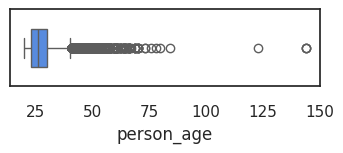

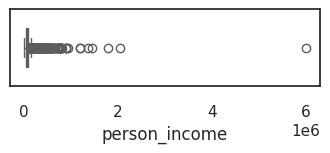

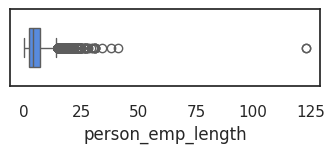

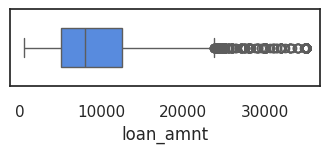

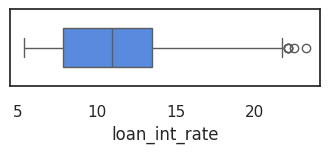

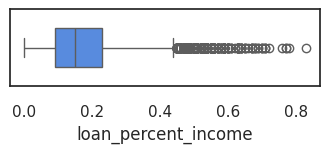

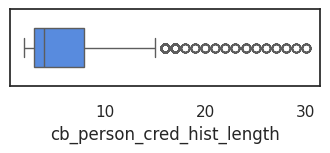

In [90]:
numeric_feature = df.select_dtypes(include = np.number)
column_to_plot = numeric_feature.columns

sns.set_theme(style = "white")

# Ploting boxplot for all numeric featires
for n in column_to_plot:
  plt.figure(figsize = (4,1))
  ax = sns.boxplot(x = df[n],
                   width = 0.5,
                   color = "#4285f4",
                   native_scale = True
                  )

  # Rotating the label if it is too long
  # if len(str(int(df[n].max()))) > 6:
  #   ax.set_xticklabels(ax.get_xticklabels(),
  #                     rotation = 30)

  plt.show()

In [91]:
numeric_column_name = df.select_dtypes(include = np.number).columns

print("Shape before removing outliers:", df.shape)
print("\n--------------------\n")

# Dropping outlier for all numeric features
for n in numeric_column_name:

  # Calculate the upper and lower limits
  Q1 = df[n].quantile(0.25)
  Q3 = df[n].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)

  print("Column name:" , n)
  print("The lower limit:", lower)
  print("The upper limit:", upper)
  print("Number of rows less than lower limit:", df[df[n] < lower].shape[0])
  print("Number of rows greater than upper limit:", df[df[n] > upper].shape[0])
  print("\n--------------------\n")

  # Removing outliers
  df = df[(df[n] > lower) & (df[n] < upper)]

  # df = df[df[n] > lower]
  # df = df[df[n] < upper]

print("Shape after removing outliers:", df.shape)

Shape before removing outliers: (28501, 12)

--------------------

Column name: person_age
The lower limit: 12.5
The upper limit: 40.5
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 1296

--------------------

Column name: person_income
The lower limit: -22152.0
The upper limit: 140920.0
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 1214

--------------------

Column name: person_emp_length
The lower limit: -5.5
The upper limit: 14.5
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 563

--------------------

Column name: loan_amnt
The lower limit: -5500.0
The upper limit: 22500.0
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 1106

--------------------

Column name: loan_int_rate
The lower limit: -0.3949999999999978
The upper limit: 21.724999999999998
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 10

------------------

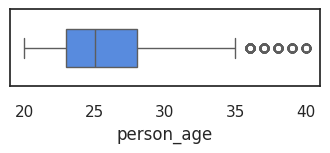

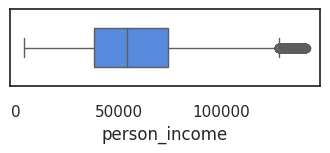

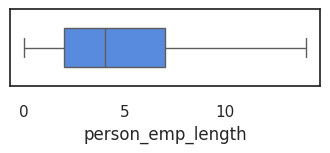

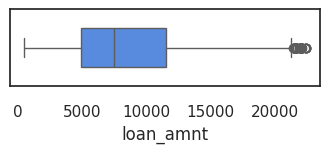

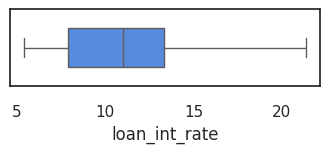

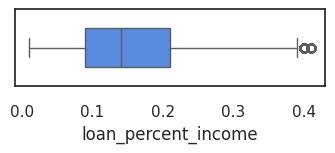

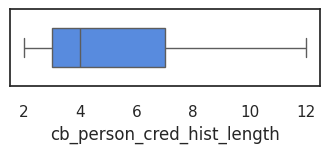

In [92]:
numeric_feature = df.select_dtypes(include = np.number)
column_to_plot = numeric_feature.columns

sns.set_theme(style = "white")

# Ploting boxplot for all numeric features
for n in column_to_plot:
  plt.figure(figsize = (4,1))
  ax = sns.boxplot(x = df[n],
                   width = 0.5,
                   color = "#4285f4",
                   native_scale = True # Showing the full value on axis
                  )

  # Rotating the label if it is too long
  # if len(str(int(df[n].max()))) > 4:
  #   ax.set_xticklabels(ax.get_xticklabels(),
  #                     rotation = 30)

  plt.show()

## Exploratory Data Analysis(EDA)

### Quick overview

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22765 entries, 1 to 32248
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  22765 non-null  int64   
 1   person_income               22765 non-null  int64   
 2   person_home_ownership       22765 non-null  object  
 3   person_emp_length           22765 non-null  float64 
 4   loan_intent                 22765 non-null  object  
 5   loan_grade                  22765 non-null  category
 6   loan_amnt                   22765 non-null  int64   
 7   loan_int_rate               22765 non-null  float64 
 8   loan_status                 22765 non-null  category
 9   loan_percent_income         22765 non-null  float64 
 10  cb_person_default_on_file   22765 non-null  category
 11  cb_person_cred_hist_length  22765 non-null  int64   
dtypes: category(3), float64(3), int64(4), object(2)
memory usage: 1.8+ MB


In [94]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,22765.0,26.102394,3.847209,20.00,23.00,25.00,28.00,40.00
person_income,22765.0,58156.461937,26547.091394,4080.00,38060.00,54000.00,74000.00,140900.00
person_emp_length,22765.0,4.352866,3.366987,0.00,2.00,4.00,7.00,14.00
loan_amnt,22765.0,8396.444103,4826.153873,500.00,4925.00,7500.00,11500.00,22400.00
loan_int_rate,22765.0,10.937707,3.190889,5.42,7.88,10.99,13.35,21.36
loan_percent_income,22765.0,0.159301,0.089401,0.01,0.09,0.14,0.21,0.41
cb_person_cred_hist_length,22765.0,4.766484,2.616959,2.00,3.00,4.00,7.00,12.00


In [95]:
df.nunique()

,0
person_age,21
person_income,3019
person_home_ownership,4
person_emp_length,15
loan_intent,6
loan_grade,7
loan_amnt,613
loan_int_rate,327
loan_status,2
loan_percent_income,41


In [96]:
# Checking number of observations in each class
print("Number of successful repayment:", len(df[df["loan_status"] == 0]))
print("Number of failed repayment:",len(df[df["loan_status"] == 1]))

Number of successful repayment: 18193
Number of failed repayment: 4572


### Finding correlation

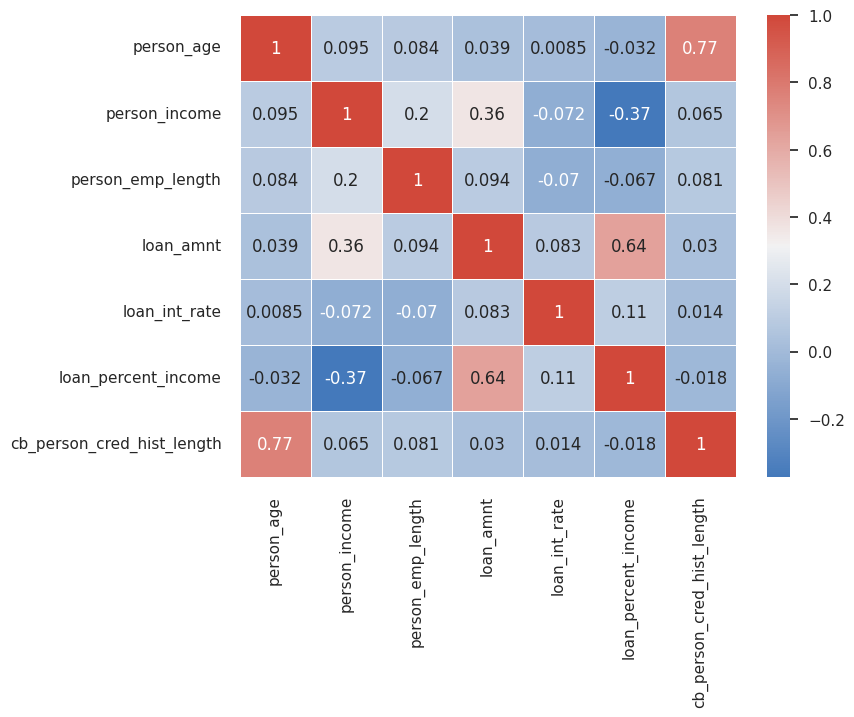

In [97]:
numeric_feature = df.select_dtypes(include = np.number).columns

data_to_plot_correlation = df[numeric_feature]
correlation_matrix = data_to_plot_correlation.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 12})
ax = sns.heatmap(correlation_matrix,
                 #mask = mask,
                 annot = True,
                 cmap = cmap,
                 linewidth = 0.5)
plt.show()

### Visualisation

In [98]:
# Count number of person in each class
df["loan_status"].value_counts()

,count
loan_status,
0,18193
1,4572


In [99]:
# Sampling data for visulisation
sample = df.groupby("loan_status").sample(n = 4000,
                                         random_state = 1)
sample["loan_status"].value_counts()

,count
loan_status,
0,4000
1,4000


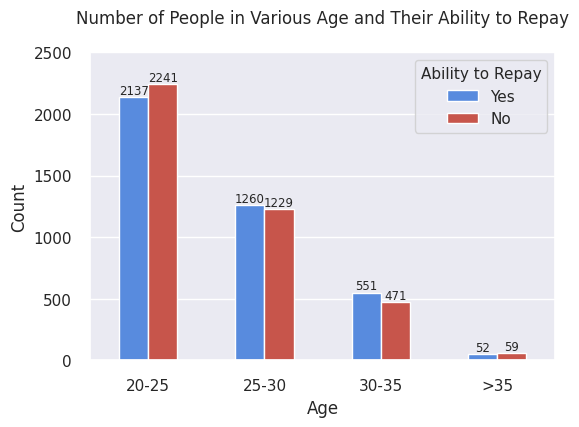

In [100]:
plt.figure(figsize = (6,4))
sns.set_theme()

# Create a new column for grouping
group = sample[["person_age", "loan_status"]]
column_to_group = "person_age"
class_column = "loan_status"

group.loc[(group[column_to_group] >= 20) & ((group[column_to_group] <= 25)), "group"] = "20-25"
group.loc[(group[column_to_group] > 25) & ((group[column_to_group] <= 30)), "group"] = "25-30"
group.loc[(group[column_to_group] > 30) & ((group[column_to_group] <= 35)), "group"] = "30-35"
group.loc[group[column_to_group] > 35, "group"] = ">35"

ax = sns.countplot(data = group,
                   x = "group",
                   hue = class_column,
                   width = 0.5,
                   palette= ["#4285f4", "#DB4437"],
                   order = ["20-25", "25-30", "30-35", ">35"]
                   )

plt.title("Number of People in Various Age and Their Ability to Repay\n",
          fontsize = 12
          #fontweight = "bold"
          )

plt.xlabel("Age")
plt.ylabel("Count")

plt.legend(title = "Ability to Repay",
           loc = "best",
           labels = ["Yes", "No"],
           frameon = True,
           title_fontsize = 11,
          )

ax.set(ylim = (0, 2500))

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.show()

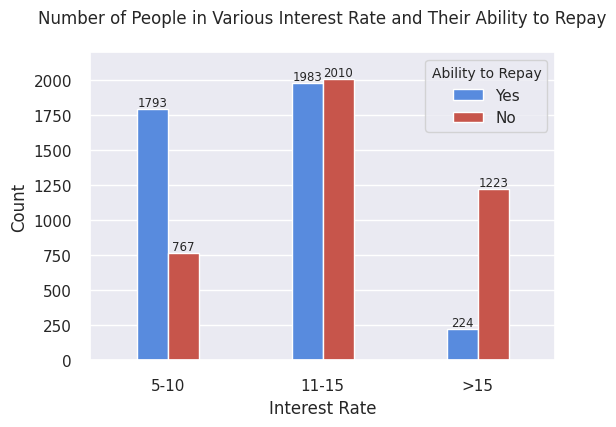

In [101]:
plt.figure(figsize = (6,4))
sns.set_theme()

# Create new column for grouping interest rate
group = sample[["loan_int_rate", "loan_status"]]
column_to_group = "loan_int_rate"
class_column = "loan_status"

group.loc[(group[column_to_group] >= 5) & ((group[column_to_group] <= 10)), "group"] = "5-10"
group.loc[(group[column_to_group] > 10) & ((group[column_to_group] <= 15)), "group"] = "11-15"
group.loc[group[column_to_group] > 15, "group"] = ">15"

ax = sns.countplot(data = group,
                   x = "group",
                   hue = class_column,
                   width = 0.4,
                   palette = ["#4285f4", "#DB4437"],
                   order = ["5-10", "11-15", ">15"]
                   )

plt.title("Number of People in Various Interest Rate and Their Ability to Repay\n",
          fontsize = 12)

plt.xlabel("Interest Rate")
plt.ylabel("Count")

plt.legend(title = "Ability to Repay",
           loc = "best",
           labels = ["Yes", "No"],
           frameon = True,
           title_fontsize = 10
          )

ax.set(ylim = (0, 2200))

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.show()

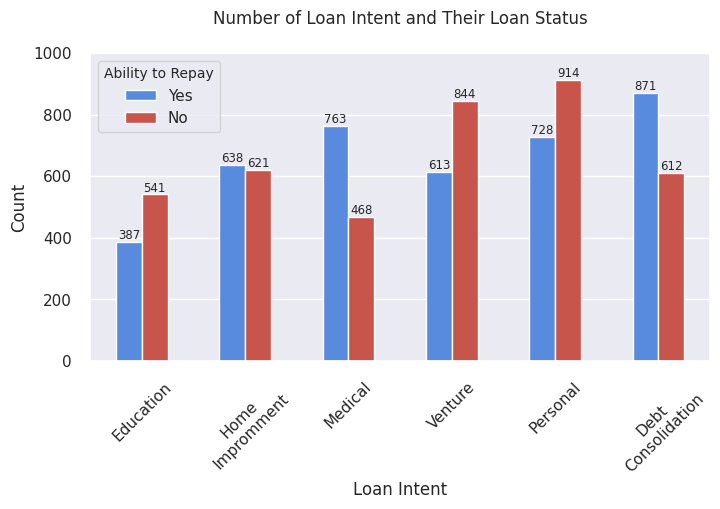

In [102]:
plt.figure(figsize = (8,4))

ax = sns.countplot(data = sample,
                   x = "loan_intent",
                   hue = "loan_status",
                   palette= ["#4285f4", "#DB4437"],
                   width = 0.5
                  )

plt.title("Number of Loan Intent and Their Loan Status\n",
          fontsize = 12)
plt.xlabel("Loan Intent")
plt.ylabel("Count")

plt.legend(title = "Ability to Repay",
           loc = "best",
           labels = ["Yes", "No"],
           frameon = True,
           title_fontsize = 10,
           #bbox_to_anchor = (1.15, 0.5)
          )

ax.set(ylim = (0, 1000))
ax.tick_params(axis = "x", rotation = 45)
ax.set_xticklabels(["Education","Home\nImpromment","Medical","Venture","Personal","Debt\nConsolidation"])

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.show()

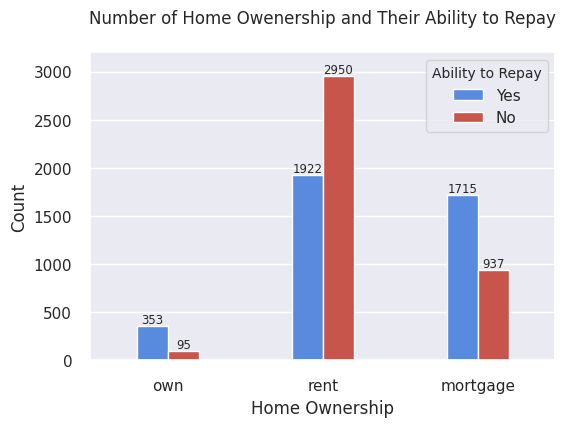

In [103]:
plt.figure(figsize = (6,4))

ax = sns.countplot(data = sample[sample["person_home_ownership"] != "other"],
                   x = "person_home_ownership",
                   hue = "loan_status",
                   palette= ["#4285f4", "#DB4437"],
                   order = ["own", "rent", "mortgage"],
                   width = 0.4
                   )

plt.title("Number of Home Owenership and Their Ability to Repay\n",
          fontsize = 12)

plt.xlabel("Home Ownership")
plt.ylabel("Count")

plt.legend(title = "Ability to Repay",
           loc = "best",
           labels = ["Yes", "No"],
           frameon = True,
           title_fontsize = 10
          )

ax.set(ylim = (0, 3200))

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.show()

## Data Preprocessing for ML

In [104]:
# Dealing with an imbalance class

# Count the number of observations in each class
display(df["loan_status"].value_counts())
class_count_0, class_count_1 = df["loan_status"].value_counts()

# Seperate class
class_0 = df[df["loan_status"] == 0]
class_1 = df[df["loan_status"] == 1]

print("\n----------\n")
print("Before doing under sampling:", df.shape)
print("Class 0:", df[df["loan_status"] == 0].shape)
print("Class 1:", df[df["loan_status"] == 1].shape)

# Sample data
class_0_under = class_0.sample(class_count_1)
df = pd.concat([class_0_under, class_1], axis = 0)

print("\n----------\n")
print("After doing under sampling:", df.shape)
print("Class 0:", df[df["loan_status"] == 0].shape)
print("Class 1:", df[df["loan_status"] == 1].shape)

,count
loan_status,
0,18193
1,4572



----------

Before doing under sampling: (22765, 12)
Class 0: (18193, 12)
Class 1: (4572, 12)

----------

After doing under sampling: (9144, 12)
Class 0: (4572, 12)
Class 1: (4572, 12)


## Creating ML model

### Training multiple ML models

In [121]:
categorical_features = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]
ordinal_features = {"loan_grade": ["A", "B", "C", "D", "E", "F", "G"] } # A (Lowest risk) -> G (Highest risk)

classifier = setup(df,
                   target = "loan_status",
                   train_size = 0.7,

                   categorical_features = categorical_features,
                   max_encoding_ohe = 25,
                   encoding_method = "max_encoding_ohe",

                   ordinal_features = ordinal_features,

                   numeric_imputation = "median",
                   categorical_imputation = "mode",

                   remove_multicollinearity = True,
                   feature_selection = False,
                   normalize = True,
                   normalize_method = "zscore",

                   session_id = 0 # Set seed
                   )

,Description,Value
0,Session id,0
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(9144, 12)"
4,Transformed data shape,"(9144, 19)"
5,Transformed train set shape,"(6400, 19)"
6,Transformed test set shape,"(2744, 19)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,3


In [123]:
# Printing the data after transformation
preprocess_data = get_config("train_transformed")
preprocess_data.head()

,person_age,person_income,person_home_ownership_rent,person_home_ownership_mortgage,person_home_ownership_own,person_home_ownership_other,person_emp_length,loan_intent_debtconsolidation,loan_intent_medical,loan_intent_personal,loan_intent_education,loan_intent_homeimprovement,loan_intent_venture,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
23652,1.566605,-0.200113,0.814107,-0.715992,-0.243417,-0.061352,-0.349130,2.159564,-0.514852,-0.43897,-0.479152,-0.360477,-0.421113,0.394753,0.073869,0.089787,-0.540023,1.251004,0
28906,0.780395,1.145088,-1.228340,1.396663,-0.243417,-0.061352,2.651716,2.159564,-0.514852,-0.43897,-0.479152,-0.360477,-0.421113,-1.183767,-0.222932,-0.900116,-0.540023,0.483921,0
1284,-0.529955,-1.070880,-1.228340,1.396663,-0.243417,-0.061352,0.251039,-0.463056,1.942307,-0.43897,-0.479152,-0.360477,-0.421113,1.184014,-0.915467,-0.207184,-0.540023,-0.666703,1
25659,1.042465,0.895265,0.814107,-0.715992,-0.243417,-0.061352,2.051547,-0.463056,1.942307,-0.43897,-0.479152,-0.360477,-0.421113,1.184014,0.667470,-0.504155,-0.540023,2.018087,1
2545,-0.267885,-0.891930,0.814107,-0.715992,-0.243417,-0.061352,-0.349130,2.159564,-0.514852,-0.43897,-0.479152,-0.360477,-0.421113,0.394753,-1.113334,-0.801126,-0.540023,-0.666703,0


In [128]:
# Comparing the model performance
top5_model = compare_models(sort = "Accuracy",
                            cross_validation = False,
                            #fold = 10, # Using cross-validation for training
                            n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8648,0.9372,0.8039,0.9154,0.8560,0.7296,0.7351,1.0700
xgboost,Extreme Gradient Boosting,0.8520,0.9350,0.8083,0.8858,0.8453,0.7041,0.7068,1.3900
gbc,Gradient Boosting Classifier,0.8502,0.9240,0.7879,0.9001,0.8403,0.7004,0.7059,1.0100
rf,Random Forest Classifier,0.8499,0.9201,0.7843,0.9027,0.8393,0.6997,0.7058,0.8000
ada,Ada Boost Classifier,0.8240,0.8943,0.7857,0.8508,0.8170,0.6480,0.6499,0.3900
et,Extra Trees Classifier,0.8189,0.9028,0.7792,0.8464,0.8114,0.6378,0.6398,0.8900
dt,Decision Tree Classifier,0.7981,0.7981,0.8061,0.7934,0.7997,0.5962,0.5963,0.2200
lr,Logistic Regression,0.7832,0.8596,0.7777,0.7863,0.7820,0.5663,0.5664,0.2600
lda,Linear Discriminant Analysis,0.7792,0.8594,0.7668,0.7862,0.7764,0.5583,0.5585,0.1300
ridge,Ridge Classifier,0.7788,0.7788,0.7668,0.7857,0.7761,0.5576,0.5577,0.1300


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [129]:
# The best model
top5_model[0]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

### Evaluation

In [130]:
model = create_model("lightgbm",
                     cross_validation = False
                     #fold = 10 # # If using cross-validation for training
                     )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.8648,0.9372,0.8039,0.9154,0.8560,0.7296,0.7351


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

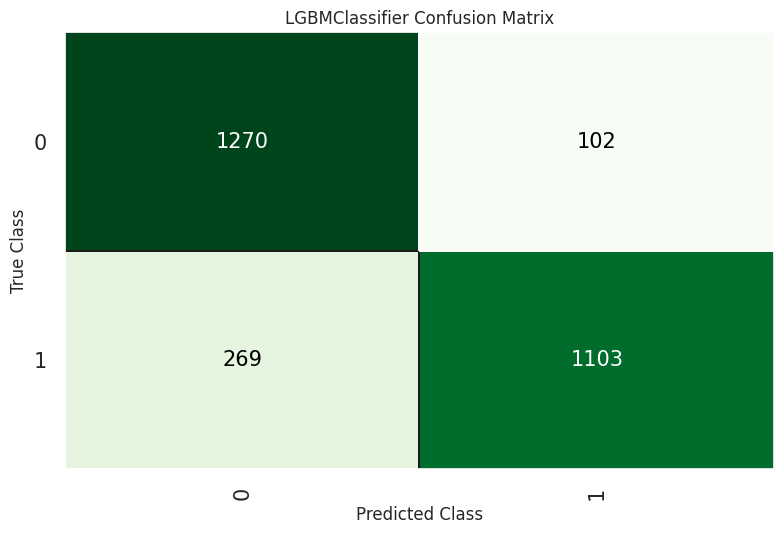

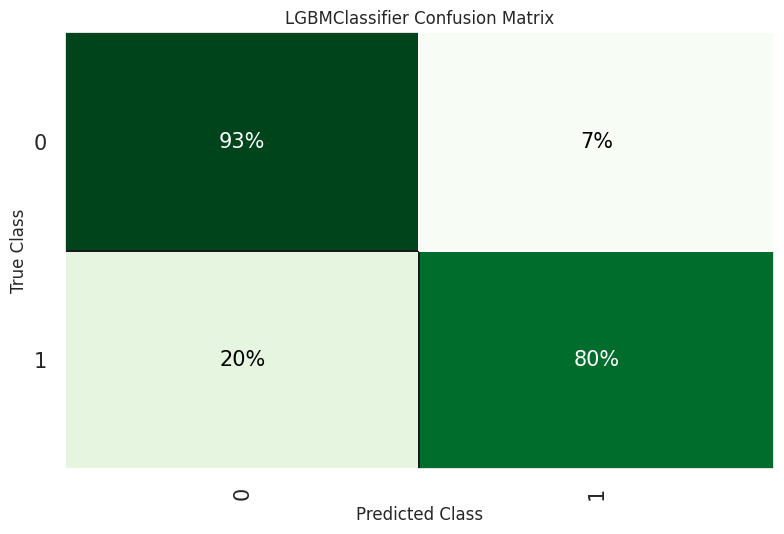

In [131]:
# Plot a confusion matrix of number of observtions
ax = plot_model(model,
                plot = "confusion_matrix",
                scale = 1 # Figure size
                )

# Plot a confusion matrix of percentage
ax = plot_model(model,
                plot = "confusion_matrix",
                scale = 1, # Figure size
                plot_kwargs = {"percent" : True})

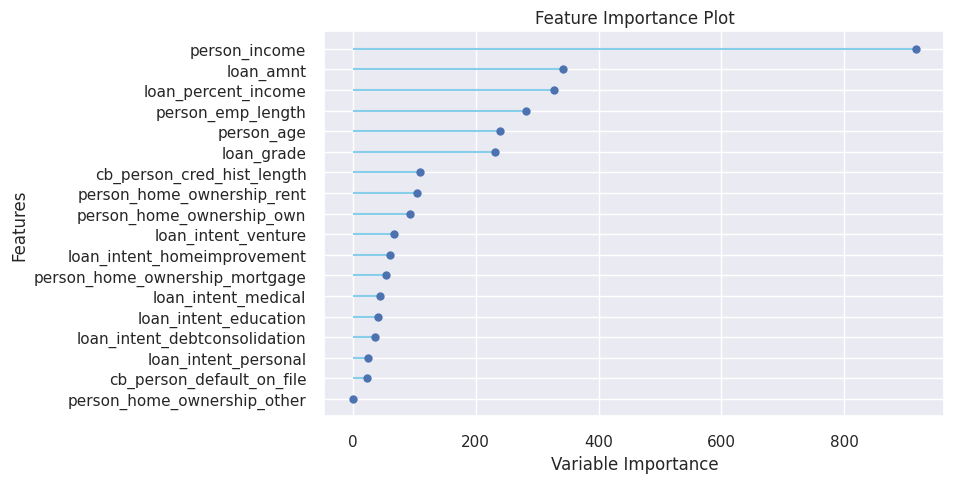

In [132]:
# Plotting feature importance
plot_model(model, plot = "feature_all")

In [133]:
# Tunning the model to find the best hyperparameter
tuned_model = tune_model(top5_model[0],
                         optimize = "Accuracy",
                         n_iter = 30, # Number of set of hyperparameters
                         choose_better = True,
                         fold = 10 # Available for cross-validation only
                         )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8562,0.9276,0.8156,0.8878,0.8502,0.7125,0.7149
1,0.8625,0.9418,0.8250,0.8919,0.8571,0.7250,0.7270
2,0.8438,0.9290,0.7750,0.8986,0.8322,0.6875,0.6941
3,0.8719,0.9405,0.8312,0.9048,0.8664,0.7438,0.7462
4,0.8359,0.9187,0.7531,0.9026,0.8211,0.6719,0.6813
5,0.8625,0.9458,0.8344,0.8841,0.8585,0.7250,0.7261
6,0.8562,0.9345,0.7938,0.9071,0.8467,0.7125,0.7181
7,0.8531,0.9413,0.8000,0.8951,0.8449,0.7062,0.7103
8,0.8406,0.9212,0.7625,0.9037,0.8271,0.6812,0.6897


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


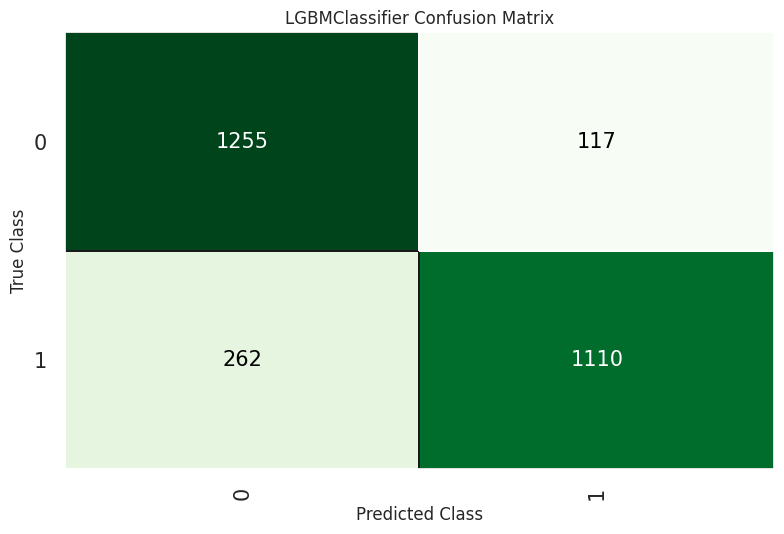

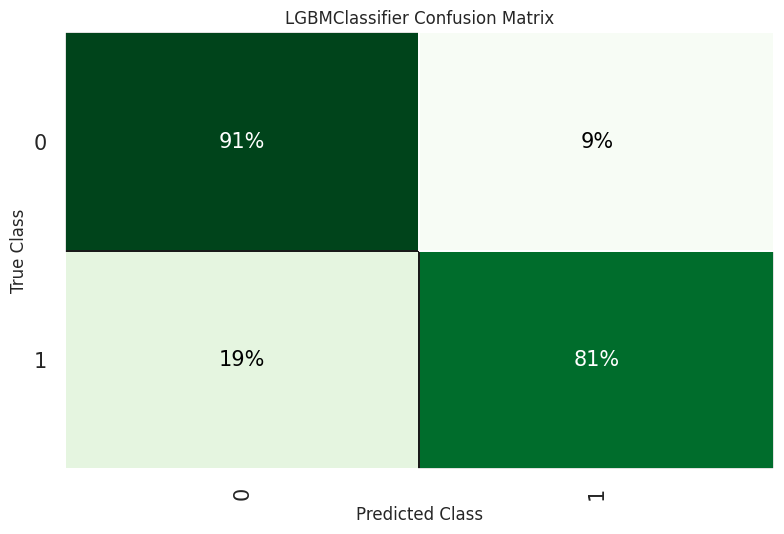

In [134]:
# Plot a confusion matrix of number of observtions
ax = plot_model(tuned_model,
                plot = "confusion_matrix",
                scale = 1 # Figure size
                )

# Plot a confusion matrix of percentage
ax = plot_model(tuned_model,
                plot = "confusion_matrix",
                scale = 1, # Figure size
                plot_kwargs = {"percent" : True})

In [135]:
# Printing hyperparameter of models

# Initial model
print("Initial model:\n\n", model)
print("\n----------\n")

# Tuned model
print("Tuned model:\n\n", tuned_model)

Initial model:

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

----------

Tuned model:

 LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0,
               n_estimators=210, n_jobs=-1, num_leaves=6, objective=None,
               random_state=0, reg_alpha=1, reg_lambda=0.3, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [136]:
final_model = finalize_model(tuned_model)

In [137]:
predictions = predict_model(final_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8728,0.9480,0.8200,0.9169,0.8657,0.7456,0.7498


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,prediction_label,prediction_score
22713,29,57300,own,13.0,medical,B,12000,11.48,0.21,N,8,0,0,0.9973
14254,24,90000,mortgage,5.0,venture,C,19200,12.84,0.21,Y,4,1,0,0.9142
16665,25,109000,mortgage,5.0,personal,B,15000,10.25,0.14,N,2,0,0,0.8818
11431,25,60000,rent,2.0,homeimprovement,C,10000,12.09,0.17,N,2,0,0,0.5526
20200,27,39000,mortgage,0.0,debtconsolidation,C,6900,12.87,0.18,N,9,0,1,0.5744


In [117]:
# Saving pickle file
save_model(tuned_model, "saved_credit_risk_prediction")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['person_age', 'person_income',
                                              'person_emp_length', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_cred_hist_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=n...
                                importance_type=None,
                                interac